## 1. Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
!pip install minisom

In [2]:
from minisom import MiniSom
from EDA.age import calc_age
from EDA.educ import education
from EDA.data_load import data_load

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\cust_data.csv')

# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

cust_info

,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,age,education,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,22,22.0,...,0.192154,2017,NaN,38.754263,-9.163397,23,HS,1,1545.0,0
19330,Donald Robertson,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,21,20.0,...,0.098647,2015,NaN,38.777761,-9.156197,41,HS,0,10219.0,1
2272,Phd. Felicia Bradshaw,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,9,310.0,...,0.497251,2008,NaN,38.785329,-9.127113,36,Phd.,1,1753.0,2
25288,Emma Williams,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,12,499.0,...,0.206713,2010,NaN,38.744086,-9.156589,80,HS,1,11195.0,7
12829,Hilda Huerta,1999-01-01 00:00:00,0,0,0,2,82.0,22.0,21,9.0,...,0.200625,2015,NaN,38.756024,-9.162970,24,HS,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,20,18.0,...,0.096366,2008,935162.0,38.734446,-9.171911,48,Phd.,1,9730.0,0
26447,Curtis Thompson,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,15,267.0,...,0.118998,2014,NaN,38.767070,-9.144301,37,HS,0,2416.0,0
182,Richard Carter,2000-01-01 00:00:00,0,0,0,2,83.0,23.0,23,23.0,...,0.199432,2016,953891.0,38.728487,-9.164140,23,HS,0,1491.0,0


## 3. Data Scaling and Normalization

In [4]:
num_cust_info = cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info = num_cust_info.drop([ 'loyalty_card_number', 'latitude', 'longitude'], axis=1)
num_cust_info

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,age,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,0,0,0,2,91.0,20.0,22,22.0,195.0,964.0,...,48.0,47.0,105.0,85.0,0.192154,2017,23,1,1545.0,0
19330,1,0,0,2,197.0,5958.0,21,20.0,1435.0,434.0,...,80.0,45.0,1964.0,85.0,0.098647,2015,41,0,10219.0,1
2272,1,1,0,20,397.0,20.0,9,310.0,379.0,222.0,...,170.0,46.0,5.0,408.0,0.497251,2008,36,1,1753.0,2
25288,3,4,1,2,5282.0,237.0,12,499.0,873.0,460.0,...,1068.0,617.0,1078.0,1956.0,0.206713,2010,80,1,11195.0,7
12829,0,0,0,2,82.0,22.0,21,9.0,172.0,856.0,...,39.0,48.0,103.0,83.0,0.200625,2015,24,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0,0,1,2,209.0,5474.0,20,18.0,1435.0,521.0,...,11.0,57.0,1984.0,112.0,0.096366,2008,48,1,9730.0,0
26447,0,0,0,3,185.0,1066.0,15,267.0,276.0,287.0,...,41.0,50.0,197.0,22.0,0.118998,2014,37,0,2416.0,0
182,0,0,0,2,83.0,23.0,23,23.0,189.0,921.0,...,52.0,51.0,94.0,77.0,0.199432,2016,23,0,1491.0,0


In [5]:
scaler = StandardScaler()
# Here, we are using fit_transform, by fitting and
# immediately transforming the data into the scaled values
scaled_data = scaler.fit_transform(num_cust_info)

## 4. K-Means

In [6]:
dispersion = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

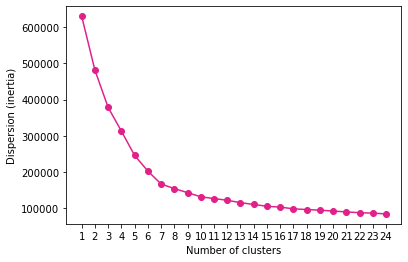

In [7]:
plt.plot(range(1, 25), dispersion, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

In [9]:
num_cust_info.groupby(['cluster_kmeans']).mean().T

cluster_kmeans,0,1,2,3,4,5,6
kids_home,0.689588,0.247321,0.974840,0.997484,1.128783,3.135141,0.000000
teens_home,0.068547,0.175893,0.092510,0.271545,0.767359,1.844522,0.000000
number_complaints,0.500000,0.200357,1.193536,1.550430,0.330564,0.934179,0.000000
distinct_stores_visited,1.992625,2.422679,19.097155,7.994338,1.994857,3.008966,1.000000
lifetime_spend_groceries,200.406291,3158.401964,297.990323,14982.854896,969.428487,4997.612290,2.701888
lifetime_spend_electronics,4999.557484,628.382857,19.518870,199.985322,83.301682,199.940083,1.149657
typical_hour,20.951844,18.146607,9.041030,11.914447,9.747774,17.394708,0.000000
lifetime_spend_vegetables,20.033623,281.938571,290.701955,799.374292,1421.770129,602.060573,2.124256
lifetime_spend_nonalcohol_drinks,1500.946855,327.779821,290.884072,900.710841,37.198022,901.055762,2.302029
lifetime_spend_alcohol_drinks,499.866161,481.201429,204.452874,599.027679,34.948961,500.935054,2.704794


In [10]:
num_cust_info.mean()

kids_home                                     1.146776
teens_home                                    0.512968
number_complaints                             0.764418
distinct_stores_visited                       6.121108
lifetime_spend_groceries                   3978.899334
lifetime_spend_electronics                  965.303071
typical_hour                                 14.353124
lifetime_spend_vegetables                   564.245311
lifetime_spend_nonalcohol_drinks            628.791908
lifetime_spend_alcohol_drinks               379.369654
lifetime_spend_meat                         513.912460
lifetime_spend_fish                         774.879925
lifetime_spend_hygiene                      162.835290
lifetime_spend_videogames                   536.869491
lifetime_total_distinct_products           1123.962169
percentage_of_products_bought_promotion       0.190981
year_first_transaction                     2008.683912
age                                          52.506500
female    

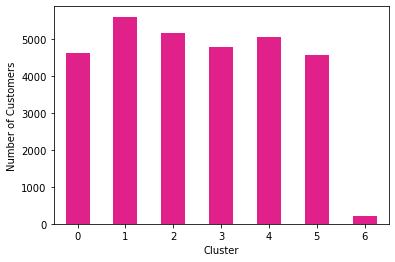

In [11]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

# BisectingKMeans

In [36]:
from sklearn.cluster import BisectingKMeans

In [42]:
dispersion_bkm = []
for k in range(1, 25):
    bisect_kmeans = BisectingKMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion_bkm.append(bisect_kmeans.inertia_)

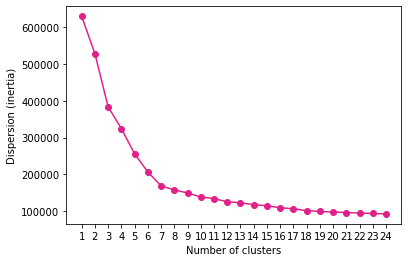

In [41]:
plt.plot(range(1, 25), dispersion_bkm, marker='o', color = '#e0218a')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [55]:
bisect_kmeans = BisectingKMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_bisect_kmeans'] = bisect_kmeans.predict(scaled_data)

In [56]:
num_cust_info.groupby(['cluster_bisect_kmeans']).mean().T

cluster_bisect_kmeans,0,1,2,3,4,5,6
kids_home,1.052211,0.000000,0.974588,3.080548,0.995814,0.186419,0.689588
teens_home,0.743197,0.000000,0.090204,1.810840,0.271034,0.104420,0.068547
number_complaints,0.379252,0.000000,1.190495,0.930591,1.548347,0.110399,0.500000
distinct_stores_visited,1.995918,1.000000,19.139282,3.008355,7.984512,2.481102,1.992625
lifetime_spend_groceries,939.620578,2.701888,298.249467,5004.278278,14966.227501,3524.128337,200.406291
lifetime_spend_electronics,143.987585,1.149657,19.540640,202.607112,200.739431,652.714499,4999.557484
typical_hour,10.005272,0.000000,9.040349,17.409169,11.923399,19.284006,20.951844
lifetime_spend_vegetables,1263.484864,2.124256,291.144520,601.406812,798.918376,273.042921,20.033623
lifetime_spend_nonalcohol_drinks,71.856463,2.302029,291.319884,899.001928,900.274383,324.641683,1500.946855
lifetime_spend_alcohol_drinks,71.878401,2.704794,204.488458,500.328620,598.788196,512.922272,499.866161


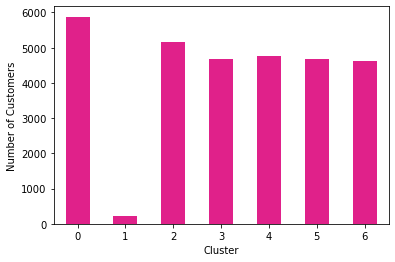

In [57]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_bisect_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

# OPTICS

In [66]:
from sklearn.cluster import OPTICS

In [68]:
optics = OPTICS(min_samples=2).fit(scaled_data)
num_cust_info['cluster_optics'] = optics.fit_predict(scaled_data)

AttributeError: 'OPTICS' object has no attribute 'predict'

In [69]:
num_cust_info['cluster_optics'] = optics.fit_predict(scaled_data)

KeyboardInterrupt: 

In [ ]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_optics']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
spectral = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200).fit(scaled_data)
num_cust_info['cluster_spectral'] = spectral.predict(scaled_data)

In [ ]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_spectral']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

# Association Rules

In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import ast
import matplotlib.pyplot as plt

In [13]:
# Import utilities
from utils import *

# DATA LOAD NOT WORKING FOR EXCEL

In [14]:
prod_map = pd.read_excel('.\\Data\Product Mapping Excel File.xlsx')
prod_map

<>:1: DeprecationWarning: invalid escape sequence \P
<>:1: DeprecationWarning: invalid escape sequence \P
C:\Users\abdar\AppData\Local\Temp/ipykernel_12248/4010249089.py:1: DeprecationWarning: invalid escape sequence \P
  prod_map = pd.read_excel('.\\Data\Product Mapping Excel File.xlsx')


,product_name,category
0,champagne,alcohol_drinks
1,bramble,alcohol_drinks
2,white wine,alcohol_drinks
3,dessert wine,alcohol_drinks
4,french wine,alcohol_drinks
...,...,...
159,portal,videogames
160,portal 2,videogames
161,final fantasy XX,videogames
162,final fantasy XIX,videogames


In [15]:
# Import dataset
basket = data_load('.\\Data\\Customer Basket Dataset.csv')
basket.head()

,customer_id,invoice_id,list_of_goods
0,7980,6494405,"['fresh bread', 'cake', 'grated cheese', 'fren..."
1,9995,6855482,"['bramble', 'beer', 'white wine', 'almonds', '..."
2,10060,3614116,"['fromage blanc', 'olive oil', 'tomato sauce',..."
3,1461,6464656,"['pokemon shield', 'white wine', 'google table..."
4,7830,10330249,"['olive oil', 'deodorant', 'whole weat flour',..."


In [16]:
# Create list of lists
list_of_goods = [ast.literal_eval(product) for product in basket["list_of_goods"].values]
list_of_goods

[['fresh bread',
  'cake',
  'grated cheese',
  'french fries',
  'whole wheat pasta',
  'candy bars',
  'beats headphones',
  'half-life 2',
  'phone car charger',
  'cream',
  'cereals',
  'babies food'],
 ['bramble',
  'beer',
  'white wine',
  'almonds',
  'half-life: alyx',
  'cauliflower',
  'cider',
  'yogurt cake',
  'champagne',
  'chili',
  'soda',
  'black beer',
  'catfish'],
 ['fromage blanc',
  'olive oil',
  'tomato sauce',
  'avocado',
  'megaman zero 2',
  'cooking oil',
  'iPad',
  'shampoo',
  'oil',
  'green tea'],
 ['pokemon shield',
  'white wine',
  'google tablet',
  'canned_tuna',
  'green beans',
  'bacon',
  'cider',
  'pokemon sword',
  'beats headphones',
  'airpods',
  'phone charger',
  'metroid prime'],
 ['olive oil',
  'deodorant',
  'whole weat flour',
  'chutney',
  'escalope',
  'gums',
  'rice',
  'airpods',
  'oil',
  'cookies',
  'muffins',
  'laptop'],
 ['ratchet & clank 2',
  'megaman zero',
  'eggplant',
  'body spray',
  'barbecue sauce',
  's

In [17]:
# Encoding our data
te = TransactionEncoder()
te_fit = te.fit(list_of_goods).transform(list_of_goods)
transactions_items = pd.DataFrame(te_fit, columns=te.columns_)

In [18]:
# Viewing our transactions_items
transactions_items.head(10)

,airpods,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,beats headphones,beer,...,vacuum cleaner,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [19]:
# Using 5% as minimum support and obtaining frequent_itemsets_grocery
# In real life scenario, support is typically a value between 3% to 8%, depending
# on the dataset
frequent_itemsets_grocery = apriori(
    transactions_items, min_support=0.05, use_colnames=True
    )

In [20]:
frequent_itemsets_grocery.sort_values(by='support', ascending=False)

,support,itemsets
35,0.466850,(oil)
14,0.463350,(cooking oil)
6,0.362925,(cake)
7,0.298650,(candy bars)
101,0.297438,"(cooking oil, oil)"
...,...,...
150,0.050438,"(candy bars, oil, napkins)"
4,0.050412,(burgers)
127,0.050400,"(carrots, asparagus, tomatoes)"
123,0.050400,"(spaghetti, oil)"


In [21]:
# We'll use a confidence level of 20%
rules_grocery = association_rules(frequent_itemsets_grocery, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [22]:
rules_grocery

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(carrots),(asparagus),0.106175,0.146250,0.059650,0.561808,3.841425,0.044122,1.948348
1,(asparagus),(carrots),0.146250,0.106175,0.059650,0.407863,3.841425,0.044122,1.509491
2,(asparagus),(tomatoes),0.146250,0.132288,0.079062,0.540598,4.086541,0.059715,1.888788
3,(tomatoes),(asparagus),0.132288,0.146250,0.079062,0.597657,4.086541,0.059715,2.121944
4,(cake),(babies food),0.362925,0.248087,0.122963,0.338810,1.365686,0.032925,1.137210
...,...,...,...,...,...,...,...,...,...
269,"(oil, gums)","(cake, cooking oil)",0.159925,0.227887,0.053988,0.337580,1.481345,0.017543,1.165594
270,"(cake, cooking oil)","(oil, gums)",0.227887,0.159925,0.053988,0.236904,1.481345,0.017543,1.100877
271,"(cake, gums)","(cooking oil, oil)",0.122688,0.297438,0.053988,0.440041,1.479439,0.017496,1.254667
272,"(cooking oil, gums)","(cake, oil)",0.157612,0.229513,0.053988,0.342533,1.492438,0.017813,1.171903


In [23]:
frequent_itemsets_grocery_iter_2 = apriori(
    transactions_items, min_support=0.02, use_colnames=True
    )

# We'll use a confidence level of 20%
rules_grocery_iter_2 = association_rules(frequent_itemsets_grocery_iter_2, 
                                  metric="confidence", 
                                  min_threshold=0.2)

In [24]:
rules_grocery_iter_2.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1054,"(mashed potato, tomatoes)","(carrots, asparagus)",0.041925,0.059650,0.020275,0.483602,8.107321,0.017774,1.820978
1049,"(carrots, asparagus)","(mashed potato, tomatoes)",0.059650,0.041925,0.020275,0.339899,8.107321,0.017774,1.451408
1053,"(asparagus, tomatoes)","(carrots, mashed potato)",0.079062,0.031663,0.020275,0.256443,8.099256,0.017772,1.302304
1050,"(carrots, mashed potato)","(asparagus, tomatoes)",0.031663,0.079062,0.020275,0.640347,8.099256,0.017772,2.560631
1051,"(carrots, tomatoes)","(asparagus, mashed potato)",0.067375,0.037325,0.020275,0.300928,8.062362,0.017760,1.377075
1052,"(asparagus, mashed potato)","(carrots, tomatoes)",0.037325,0.067375,0.020275,0.543202,8.062362,0.017760,2.041656
1026,"(pokemon scarlet, pokemon violet)",(pokemon sword),0.024362,0.121413,0.021413,0.878912,7.239059,0.018455,7.255793
1031,"(pokemon shield, pokemon violet)",(pokemon sword),0.039125,0.121413,0.034375,0.878594,7.236440,0.029625,7.236787
1034,(pokemon sword),"(pokemon shield, pokemon violet)",0.121413,0.039125,0.034375,0.283126,7.236440,0.029625,1.340367
1036,"(pokemon shield, ratchet & clank)",(pokemon sword),0.023625,0.121413,0.020712,0.876720,7.220999,0.017844,7.126740


In [25]:
rules_grocery_iter_2.sort_values(by='support', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
183,(oil),(cooking oil),0.466850,0.463350,0.297438,0.637116,1.375021,0.081123,1.478846
182,(cooking oil),(oil),0.463350,0.466850,0.297438,0.641928,1.375021,0.081123,1.488948
83,(oil),(cake),0.466850,0.362925,0.229513,0.491619,1.354603,0.060081,1.253146
82,(cake),(oil),0.362925,0.466850,0.229513,0.632397,1.354603,0.060081,1.450340
62,(cake),(cooking oil),0.362925,0.463350,0.227887,0.627919,1.355172,0.059726,1.442293
63,(cooking oil),(cake),0.463350,0.362925,0.227887,0.491826,1.355172,0.059726,1.253655
118,(oil),(candy bars),0.466850,0.298650,0.188537,0.403850,1.352253,0.049113,1.176466
117,(candy bars),(oil),0.298650,0.466850,0.188537,0.631299,1.352253,0.049113,1.446023
101,(cooking oil),(candy bars),0.463350,0.298650,0.186250,0.401964,1.345937,0.047871,1.172755
100,(candy bars),(cooking oil),0.298650,0.463350,0.186250,0.623640,1.345937,0.047871,1.425894


# No ECLAT yet or maybe not needed

## Association Rules by cluster

In [26]:
# Join datasets
cust_clust = basket.join(num_cust_info, on='customer_id')
cust_clust

,customer_id,invoice_id,list_of_goods,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,age,female,total_lifetime_spend,number_dependents,cluster_kmeans
0,7980,6494405,"['fresh bread', 'cake', 'grated cheese', 'fren...",5.0,2.0,1.0,3.0,4880.0,193.0,18.0,...,480.0,980.0,1923.0,0.200289,2004.0,35.0,1.0,10824.0,7.0,5.0
1,9995,6855482,"['bramble', 'beer', 'white wine', 'almonds', '...",0.0,1.0,0.0,2.0,1509.0,586.0,1.0,...,47.0,207.0,87.0,0.080874,2012.0,81.0,1.0,3544.0,1.0,4.0
2,10060,3614116,"['fromage blanc', 'olive oil', 'tomato sauce',...",0.0,0.0,0.0,5.0,6955.0,1174.0,20.0,...,279.0,539.0,460.0,0.148709,2006.0,33.0,0.0,11648.0,0.0,1.0
3,1461,6464656,"['pokemon shield', 'white wine', 'google table...",0.0,0.0,0.0,2.0,181.0,4773.0,21.0,...,29.0,2078.0,88.0,0.098668,2007.0,43.0,0.0,9227.0,0.0,0.0
4,7830,10330249,"['olive oil', 'deodorant', 'whole weat flour',...",1.0,1.0,1.0,20.0,499.0,20.0,10.0,...,65.0,5.0,528.0,0.500013,2008.0,83.0,0.0,1700.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,360,11470275,"['tomatoes', 'ham', 'zucchini', 'frozen vegeta...",1.0,1.0,0.0,2.0,1146.0,47.0,9.0,...,107.0,54.0,218.0,0.049697,2010.0,39.0,1.0,2909.0,2.0,4.0
79996,3116,7483644,"['pet food', 'soup', 'beer', 'fromage blanc', ...",0.0,0.0,0.0,3.0,6950.0,995.0,17.0,...,203.0,528.0,648.0,0.155770,2011.0,27.0,1.0,11200.0,0.0,1.0
79997,1546,9168204,"['cake', 'french fries', 'cooking oil', 'muffi...",0.0,0.0,1.0,3.0,5019.0,205.0,20.0,...,327.0,967.0,2013.0,0.199767,2012.0,77.0,1.0,10719.0,0.0,1.0
79998,7242,5054623,"['fromage blanc', 'napkins', 'sandwich', 'hone...",1.0,0.0,1.0,8.0,15549.0,198.0,12.0,...,252.0,53.0,3538.0,0.150241,2001.0,74.0,0.0,21688.0,1.0,3.0


In [27]:
def rules_cluster(cust_clust, cluster_n):
    # Select cluster data
    cluster = cust_clust[cust_clust['cluster_kmeans'] == cluster_n]
    
    list_of_goods = [ast.literal_eval(product) for product in cluster["list_of_goods"].values]
    
    te = TransactionEncoder()
    te_fit = te.fit(list_of_goods).transform(list_of_goods)
    transactions_items = pd.DataFrame(te_fit, columns=te.columns_)
    
    frequent_itemsets_grocery = apriori(
    transactions_items, min_support=0.04, use_colnames=True
    )
    
    rules_grocery = association_rules(frequent_itemsets_grocery, 
                                  metric="confidence", 
                                  min_threshold=0.2)
    
    plt.scatter(rules_grocery['lift'], rules_grocery['confidence'], color='#e0218a')
    plt.show()
   
    return rules_grocery

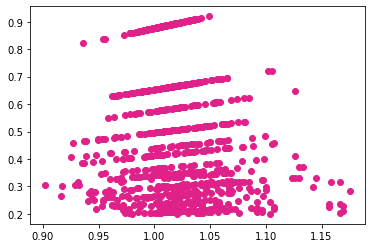

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
144,(pokemon sword),(pokemon shield),0.876895,0.652953,0.574594,0.655260,1.003533,0.002023,1.006692
143,(pokemon shield),(pokemon sword),0.652953,0.876895,0.574594,0.879994,1.003533,0.002023,1.025817
158,(pokemon sword),(pokemon violet),0.876895,0.496130,0.438766,0.500363,1.008532,0.003712,1.008472
159,(pokemon violet),(pokemon sword),0.496130,0.876895,0.438766,0.884377,1.008532,0.003712,1.064707
131,(pokemon scarlet),(pokemon sword),0.412470,0.876895,0.364224,0.883033,1.007000,0.002532,1.052477
132,(pokemon sword),(pokemon scarlet),0.876895,0.412470,0.364224,0.415357,1.007000,0.002532,1.004938
146,(pokemon violet),(pokemon shield),0.496130,0.652953,0.327325,0.659756,1.010419,0.003375,1.019995
145,(pokemon shield),(pokemon violet),0.652953,0.496130,0.327325,0.501299,1.010419,0.003375,1.010366
172,(pokemon sword),(white wine),0.876895,0.340261,0.299544,0.341596,1.003924,0.001171,1.002028
173,(white wine),(pokemon sword),0.340261,0.876895,0.299544,0.880337,1.003924,0.001171,1.028757


In [28]:
rules_grocery_0 = rules_cluster(cust_clust, 0)
rules_grocery_0.sort_values(by='support', ascending=False).head(20)

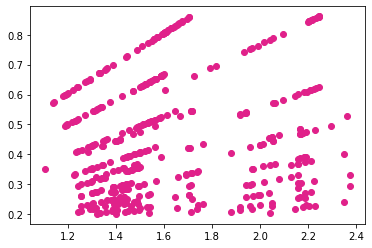

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
91,(cooking oil),(oil),0.417155,0.503848,0.317437,0.760959,1.510294,0.107255,2.075591
92,(oil),(cooking oil),0.503848,0.417155,0.317437,0.630026,1.510294,0.107255,1.575369
38,(oil),(cake),0.503848,0.330066,0.247254,0.490731,1.486765,0.080951,1.315481
37,(cake),(oil),0.330066,0.503848,0.247254,0.749103,1.486765,0.080951,1.977515
75,(white wine),(cider),0.383872,0.278037,0.223509,0.582248,2.094137,0.116778,1.728209
74,(cider),(white wine),0.278037,0.383872,0.223509,0.803880,2.094137,0.116778,3.141586
56,(oil),(candy bars),0.503848,0.270802,0.197395,0.391775,1.446724,0.060952,1.198896
55,(candy bars),(oil),0.270802,0.503848,0.197395,0.728929,1.446724,0.060952,1.830339
27,(cooking oil),(cake),0.417155,0.330066,0.196080,0.470041,1.424080,0.058391,1.264123
26,(cake),(cooking oil),0.330066,0.417155,0.196080,0.594061,1.424080,0.058391,1.435797


In [29]:
rules_grocery_1 = rules_cluster(cust_clust, 1)
rules_grocery_1.sort_values(by='support', ascending=False).head(20)

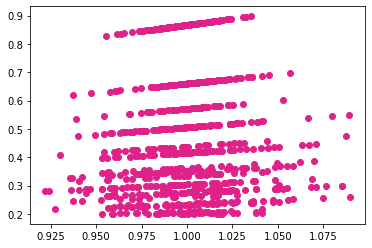

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
95,(cooking oil),(oil),0.660216,0.867222,0.571301,0.865324,0.997811,-0.001253,0.985903
96,(oil),(cooking oil),0.867222,0.660216,0.571301,0.658771,0.997811,-0.001253,0.995764
32,(cake),(oil),0.505805,0.867222,0.437531,0.865019,0.997459,-0.001115,0.983674
33,(oil),(cake),0.867222,0.505805,0.437531,0.504520,0.997459,-0.001115,0.997406
63,(oil),(candy bars),0.867222,0.415898,0.362013,0.417439,1.003706,0.001337,1.002646
62,(candy bars),(oil),0.415898,0.867222,0.362013,0.870437,1.003706,0.001337,1.024808
15,(cake),(cooking oil),0.505805,0.660216,0.335219,0.662743,1.003827,0.001278,1.007491
16,(cooking oil),(cake),0.660216,0.505805,0.335219,0.507741,1.003827,0.001278,1.003932
140,(gums),(oil),0.350402,0.867222,0.303860,0.867176,0.999947,-0.000016,0.999654
139,(oil),(gums),0.867222,0.350402,0.303860,0.350383,0.999947,-0.000016,0.999971


In [30]:
rules_grocery_2 = rules_cluster(cust_clust, 2)
rules_grocery_2.sort_values(by='support', ascending=False).head(20)

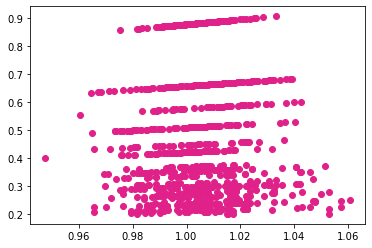

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,(cooking oil),(oil),0.656743,0.876437,0.575646,0.876516,1.000090,0.000052,1.000636
93,(oil),(cooking oil),0.876437,0.656743,0.575646,0.656802,1.000090,0.000052,1.000172
27,(cake),(oil),0.508389,0.876437,0.446159,0.877595,1.001321,0.000588,1.009456
28,(oil),(cake),0.876437,0.508389,0.446159,0.509060,1.001321,0.000588,1.001368
57,(oil),(candy bars),0.876437,0.420322,0.368397,0.420335,1.000032,0.000012,1.000023
56,(candy bars),(oil),0.420322,0.876437,0.368397,0.876466,1.000032,0.000012,1.000228
12,(cake),(cooking oil),0.508389,0.656743,0.335043,0.659029,1.003480,0.001162,1.006703
13,(cooking oil),(cake),0.656743,0.508389,0.335043,0.510158,1.003480,0.001162,1.003612
137,(oil),(gums),0.876437,0.352815,0.309653,0.353309,1.001399,0.000432,1.000763
138,(gums),(oil),0.352815,0.876437,0.309653,0.877663,1.001399,0.000432,1.010020


In [31]:
rules_grocery_3 = rules_cluster(cust_clust, 3)
rules_grocery_3.sort_values(by='support', ascending=False).head(20)

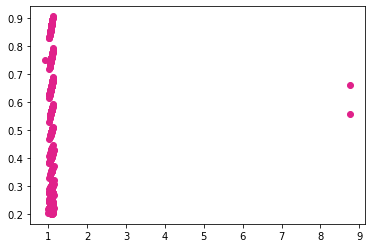

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(tomatoes),(asparagus),0.809173,0.701224,0.609890,0.753719,1.074863,0.042478,1.213154
35,(asparagus),(tomatoes),0.701224,0.809173,0.609890,0.869750,1.074863,0.042478,1.465084
78,(carrots),(tomatoes),0.606507,0.809173,0.526216,0.867618,1.072228,0.035447,1.441487
79,(tomatoes),(carrots),0.809173,0.606507,0.526216,0.650314,1.072228,0.035447,1.125274
4,(carrots),(asparagus),0.606507,0.701224,0.456969,0.753445,1.074471,0.031672,1.211803
5,(asparagus),(carrots),0.701224,0.606507,0.456969,0.651674,1.074471,0.031672,1.129670
229,(tomatoes),"(carrots, asparagus)",0.809173,0.456969,0.399363,0.493545,1.080039,0.029596,1.072218
225,"(carrots, tomatoes)",(asparagus),0.526216,0.701224,0.399363,0.758934,1.082299,0.030368,1.239394
226,"(asparagus, tomatoes)",(carrots),0.609890,0.606507,0.399363,0.654812,1.079646,0.029461,1.139940
224,"(carrots, asparagus)",(tomatoes),0.456969,0.809173,0.399363,0.873939,1.080039,0.029596,1.513761


In [62]:
rules_grocery_4 = rules_cluster(cust_clust, 4)
rules_grocery_4.sort_values(by='support', ascending=False).head(20)

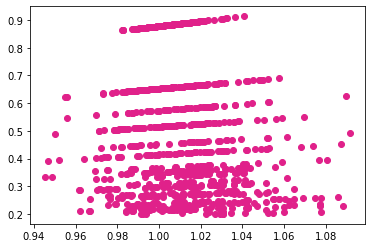

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(cooking oil),(babies food),0.652226,0.877712,0.573059,0.878620,1.001035,0.000593,1.007486
14,(babies food),(cooking oil),0.877712,0.652226,0.573059,0.652901,1.001035,0.000593,1.001945
5,(cake),(babies food),0.514919,0.877712,0.451438,0.876718,0.998867,-0.000512,0.991936
6,(babies food),(cake),0.877712,0.514919,0.451438,0.514336,0.998867,-0.000512,0.998799
7,(candy bars),(babies food),0.414659,0.877712,0.366664,0.884256,1.007456,0.002714,1.056543
8,(babies food),(candy bars),0.877712,0.414659,0.366664,0.417750,1.007456,0.002714,1.005310
63,(cooking oil),(cake),0.652226,0.514919,0.335024,0.513663,0.997561,-0.000819,0.997417
62,(cake),(cooking oil),0.514919,0.652226,0.335024,0.650635,0.997561,-0.000819,0.995446
25,(gums),(babies food),0.351378,0.877712,0.309726,0.881459,1.004269,0.001317,1.031611
26,(babies food),(gums),0.877712,0.351378,0.309726,0.352879,1.004269,0.001317,1.002318


In [33]:
rules_grocery_5 = rules_cluster(cust_clust, 5)
rules_grocery_5.sort_values(by='support', ascending=False).head(20)

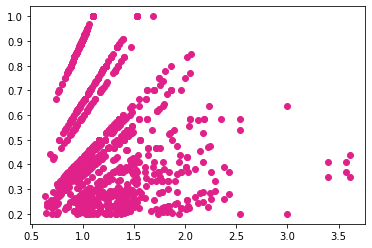

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
105,(cooking oil),(oil),0.654545,0.909091,0.593939,0.907407,0.998148,-0.001102,0.981818
106,(oil),(cooking oil),0.909091,0.654545,0.593939,0.653333,0.998148,-0.001102,0.996503
70,(candy bars),(oil),0.412121,0.909091,0.375758,0.911765,1.002941,0.001102,1.030303
71,(oil),(candy bars),0.909091,0.412121,0.375758,0.413333,1.002941,0.001102,1.002066
41,(cake),(oil),0.430303,0.909091,0.375758,0.873239,0.960563,-0.015427,0.717172
42,(oil),(cake),0.909091,0.430303,0.375758,0.413333,0.960563,-0.015427,0.971074
152,(gums),(oil),0.357576,0.909091,0.321212,0.898305,0.988136,-0.003857,0.893939
151,(oil),(gums),0.909091,0.357576,0.321212,0.353333,0.988136,-0.003857,0.993440
55,(candy bars),(cooking oil),0.412121,0.654545,0.272727,0.661765,1.011029,0.002975,1.021344
56,(cooking oil),(candy bars),0.654545,0.412121,0.272727,0.416667,1.011029,0.002975,1.007792


In [34]:
rules_grocery_6 = rules_cluster(cust_clust, 6)
rules_grocery_6.sort_values(by='support', ascending=False).head(20)

# Prod and cat??

In [35]:
prod_map

,product_name,category
0,champagne,alcohol_drinks
1,bramble,alcohol_drinks
2,white wine,alcohol_drinks
3,dessert wine,alcohol_drinks
4,french wine,alcohol_drinks
...,...,...
159,portal,videogames
160,portal 2,videogames
161,final fantasy XX,videogames
162,final fantasy XIX,videogames
